# Student Grade Prediction using Linear Regression

## Problem Statement:
The goal of this project is to predict a student's final grade (G3) using early academic indicators available before the final exam.

This is framed as a **regression problem**, where the target variable is continuous.

## Dataset Overview

The dataset comes from the UCI Machine Learning Repository and contains information about student performance.

- Number of students: 395
- Target variable: Final grade (G3), ranging from 0 to 20

The objective is to evaluate whether early indicators can meaningfully predict the final grade.

In [64]:

import pandas as pd
from pathlib import Path

DATA_PATH = Path("data/student-mat.csv")

if not DATA_PATH.exists():
  raise FileNotFoundError(
      "Dataset not found. Please download 'student-mat.csv' "
      "and place it in the 'data/' folder."
  )

df = pd.read_csv(DATA_PATH, sep=";")
df.shape


(395, 33)

In [65]:
df['G3'].describe()

,G3
count,395.000000
mean,10.415190
std,4.581443
min,0.000000
25%,8.000000
50%,11.000000
75%,14.000000
max,20.000000


## Target Variable

The target variable for this project is 'G3', which represents the student's final grade.

Based on summary statistics, the average final grade is approximately 10, with a standard deviation of around 4.5. This helps interpret model error later.

In [66]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Feature Selection

The following features were selected for the initial model:

-'studytime': Weekly study time

-'failures': Number of past class failures

-'G1': First period grade

-'G2': Second period grade

These features are available **before** the final exam, avoiding data leakage and making the prediction realistic.

In [67]:
features = ["studytime", "failures", "G1", "G2"]
x = df[features]
y= df["G3"]

x.head()




,studytime,failures,G1,G2
0,2,0,5,6
1,2,0,5,5
2,2,3,7,8
3,3,0,15,14
4,2,0,6,10


In [68]:
x.shape

(395, 4)

## Baseline Model

Before training any machine learning model, a baseline is established to understand what "better than nothing" performance looks like.

The baseline used in this project predicts the **mean final grade** for every student. Any machine learning model must outperform this baseline to be considered useful.

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42
)

x_train.shape, x_test.shape

((316, 4), (79, 4))

In [70]:
import numpy as np

mean_grade = y_train.mean()
mean_grade

np.float64(10.325949367088608)

In [71]:
baseline_pred = np.full(
    shape=len(y_test),
    fill_value=mean_grade
)
baseline_pred

array([10.32594937, 10.32594937, 10.32594937, 10.32594937, 10.32594937,
       10.32594937, 10.32594937, 10.32594937, 10.32594937, 10.32594937,
       10.32594937, 10.32594937, 10.32594937, 10.32594937, 10.32594937,
       10.32594937, 10.32594937, 10.32594937, 10.32594937, 10.32594937,
       10.32594937, 10.32594937, 10.32594937, 10.32594937, 10.32594937,
       10.32594937, 10.32594937, 10.32594937, 10.32594937, 10.32594937,
       10.32594937, 10.32594937, 10.32594937, 10.32594937, 10.32594937,
       10.32594937, 10.32594937, 10.32594937, 10.32594937, 10.32594937,
       10.32594937, 10.32594937, 10.32594937, 10.32594937, 10.32594937,
       10.32594937, 10.32594937, 10.32594937, 10.32594937, 10.32594937,
       10.32594937, 10.32594937, 10.32594937, 10.32594937, 10.32594937,
       10.32594937, 10.32594937, 10.32594937, 10.32594937, 10.32594937,
       10.32594937, 10.32594937, 10.32594937, 10.32594937, 10.32594937,
       10.32594937, 10.32594937, 10.32594937, 10.32594937, 10.32

In [72]:
from sklearn.metrics import mean_squared_error

baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)

baseline_rmse

np.float64(4.550180652162387)

## Baseline Performance

The baseline model achieves an RMSE of approximately **4.55**, which represents the error when predicting the average grade for all students.

This value serves as a reference point for evaluating more complex models.

## Linear Regression Model

A linear Regression model is trained to predict the final grade using the selected features. This model assume a linear relationship between the features and the target and minimizes Mean Squared Error during training.

In [73]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [74]:
y_pred = lin_reg.predict(x_test)

In [75]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)

lin_rmse



np.float64(2.1156768762050904)

### Model Performance Comparision

The Linear Regression model achieves an RMSE of approximately **2.12**, which is a significant improvement over the baseline RMSE of **4.55**.

This indicates that the selected features contain meaningful predictive information and that the linear model is able to capture the underlying relationship.

In [76]:
lin_reg.coef_
lin_reg.intercept_

np.float64(-1.3800633518898557)

### Interpretation of Coefficients

The learned coefficients indicate how each feature contributes to the final grade prediction. Previous grades ('G1' and 'G2') have the strongest influence, which aligns with intuition.

This suggests that earlier academic performance is a strong predictor of final outcomes.

## Residual Analysis

Residuals are defined as the difference between the actual values and the model's predictions. Analyzing residuals helps understand where the model performs well and where it struggles.

In [77]:
residuals = y_test - y_pred
residuals.describe()

,G3
count,79.000000
mean,0.152923
std,2.123626
min,-8.560916
25%,-0.340513
50%,0.335310
75%,1.270598
max,3.800182


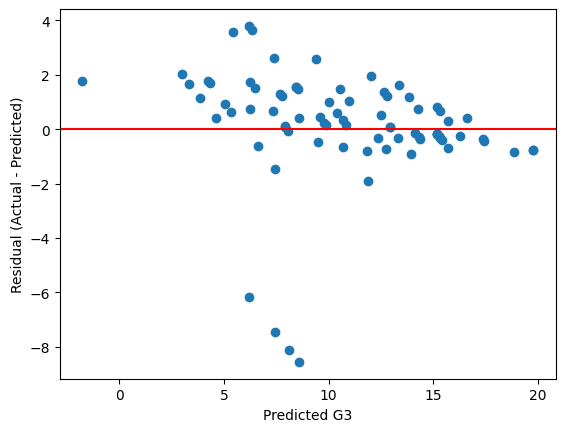

In [78]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted G3")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()

### Residual Interpretation:

The residuals are centered around zero, indicating that the model does not systematically overestimate final grades.

Most errors fall within a reasonable range, though variability is higher for mid-range grades. This suggests that while the linear model captures the main trend, some individual-level factors are not fully explained by the selected features.

## Conclusion and Limitations

This project demonstrated that early academic indicators can be used to predict a student's final grade with reasonable accuracy using a Linear Regression model.

The model significantly outperforms a mean-based baseline, indicating that the selected features contain meaningful predictive signal.

However, the model has limitations. It assumes a linear relationship and does not account for unobserved factors such as motivation, teaching quality, or personal circumstances. Future work could explore non-linear models or additional features to capture these effects.